# PROBLEM STATEMENT :-

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Goals of the Case Study:-

    Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.




In [200]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# 1. READING AND UNDERSTANDING THE DATA :-

In [201]:
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [202]:
df.shape

(9240, 37)

In [203]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [205]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.

df = df.replace('Select', np.nan)
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


# 2. EDA AND DATA TREATMENT :-

In [206]:
df.isnull().sum()  # null values in each column

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [207]:
#caluclating percentage of null values

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [208]:
#check for duplicates
sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [209]:
#check for duplicates
sum(df.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values in 'Prospect ID' and 'Lead Number'.

In [210]:
#dropping Lead Number and Prospect ID since they have all unique values

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [211]:
# we will drop the columns having more than 45% missing values.

df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>45)].columns,1)

In [212]:
df.shape

(9240, 28)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [214]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [215]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Categorical Attributes Analysis:- 

In [216]:
#checking value counts of Country column

df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Canada                     4
South Africa               4
Nigeria                    4
Germany                    4
Sweden                     3
Bangladesh                 2
Ghana                      2
Italy                      2
Philippines                2
China                      2
Uganda                     2
Asia/Pacific Region        2
Netherlands                2
Belgium                    2
Kenya                      1
Tanzania                   1
Sri Lanka                  1
Malaysia                   1
Vietnam                    1
Switzerland   

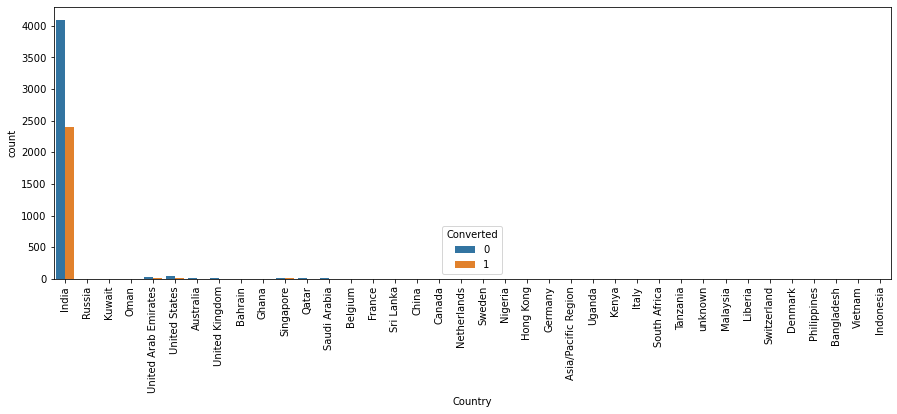

In [217]:
#plotting spread of 'Country' columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [218]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

df['Country'] = df['Country'].replace(np.nan,'India')

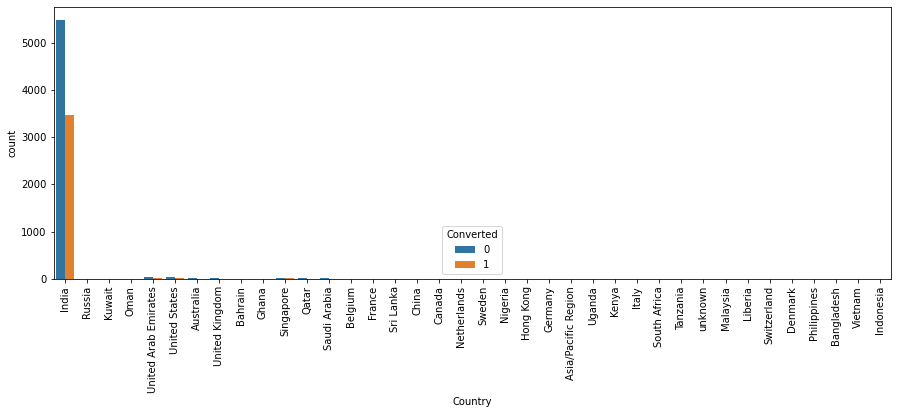

In [219]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped.

In [220]:
df.drop('Country',axis=1,inplace=True)


In [221]:
#checking value counts of "City" column

df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [222]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

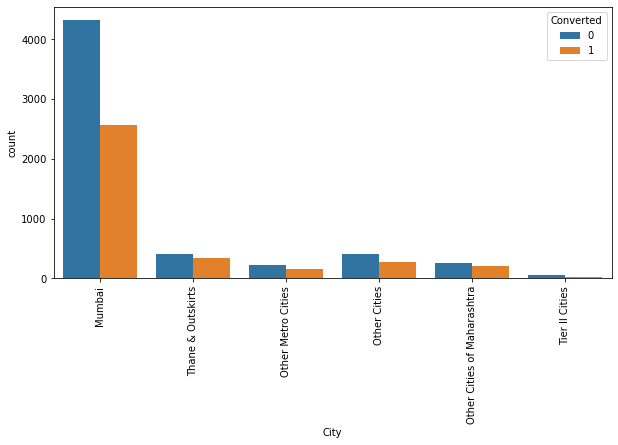

In [223]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(df.City, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [224]:
#checking value counts of Specialization column

df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [225]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

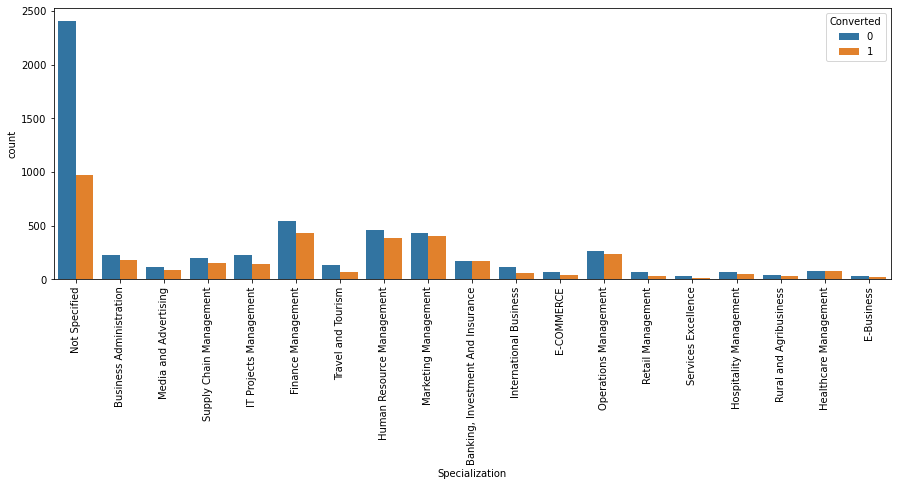

In [226]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We see that specialization with 'Management' in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [227]:
#combining Management Specializations because they show similar trends

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

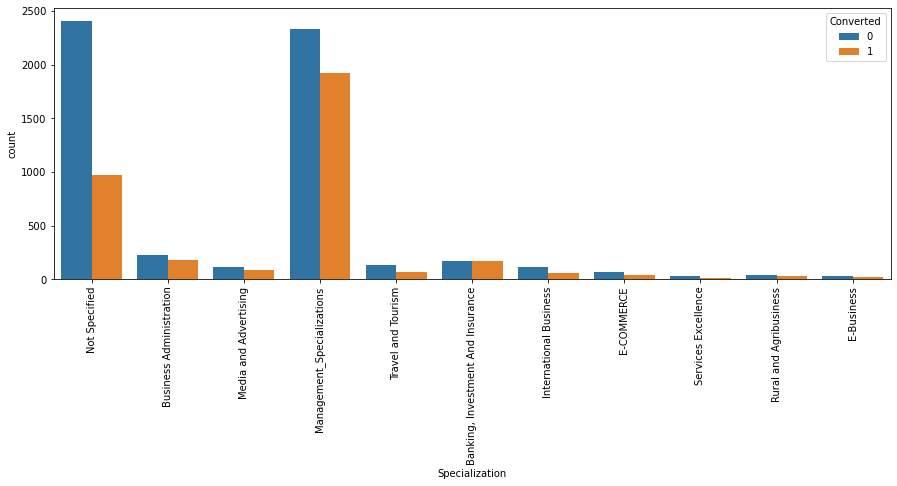

In [228]:
#visualizing count of Specialization Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [229]:
# What is your current occupation

df['What is your current occupation'].value_counts(dropna=False)



Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [230]:
#imputing NaN values with mode "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

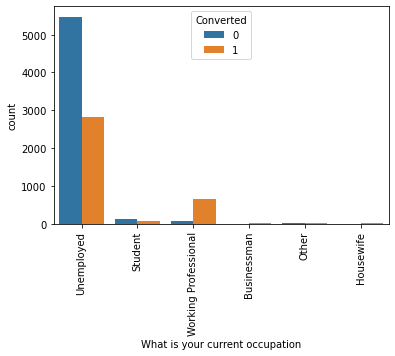

In [231]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(df['What is your current occupation'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

INFERENCES:-

1. Working Professionals going for the course have high chances of joining it.
    
2. Unemployed leads are the most in terms of Absolute numbers.



In [232]:
#checking value counts of 'What matters most to you in choosing a course' variable

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [233]:
#replacing NaN values with Mode "Better Career Prospects"

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

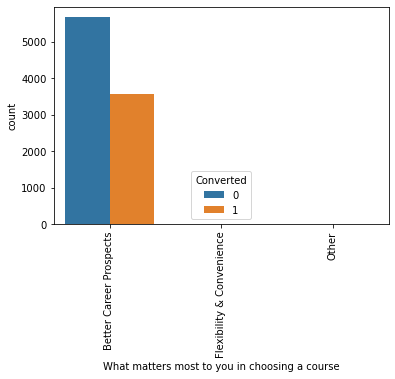

In [234]:
#visualizing count of Variable based on Converted value
s1=sns.countplot(df['What matters most to you in choosing a course'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Person with an aim of better career prospects have high chances of being converted.

In [235]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [236]:
# dropping 'What matters most to you in choosing a course' variable since it is highly skewed

df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [237]:
df.shape

(9240, 26)

In [238]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Tags                                        36.29


In [239]:
#checking value counts of 'Tag' variable

df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [240]:
#replacing NaN values with "Not Specified"

df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

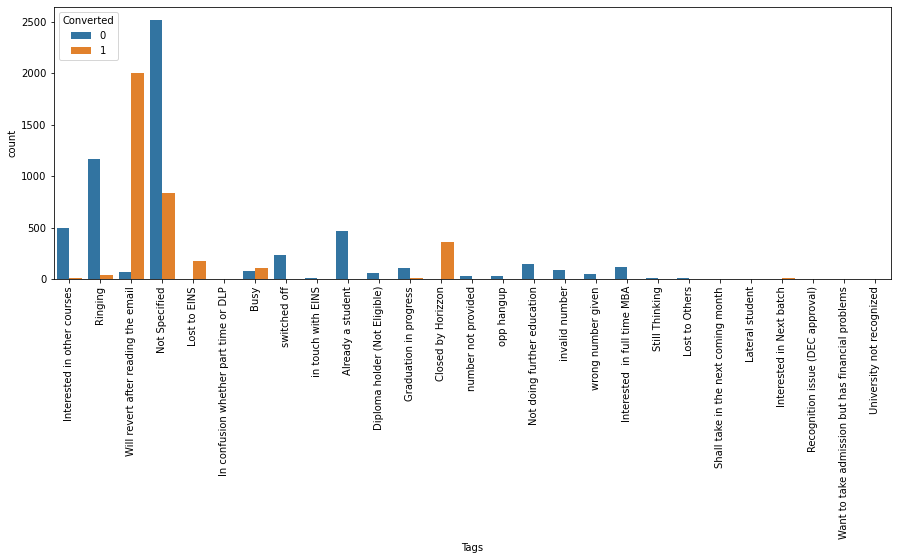

In [241]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(df['Tags'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [242]:
#replacing tags with low frequency with "Other Tags"

df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

df['Tags'] = df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [243]:
#checking value counts of 'Lead Source' column

df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
testone                 1
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
welearnblog_Home        1
blog                    1
Name: Lead Source, dtype: int64

In [244]:
#replacing Nan Values and combining low frequency values

df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                  

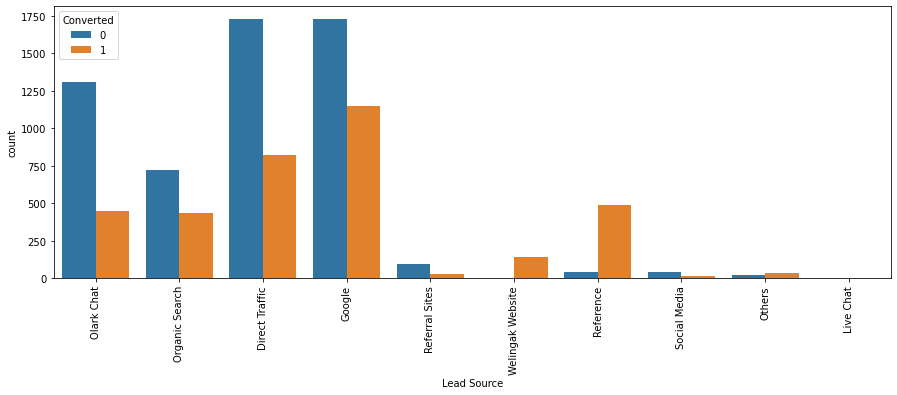

In [245]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(df['Lead Source'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


INFERENCES:-

1. Maximum number of leads are generated by Google and Direct traffic.
    
2. Conversion Rate of reference leads and leads through welingak website is high.

3. To improve overall lead conversion rate, focus should be on improving lead conversion of olark chat, organic search, direct      traffic, and google leads and generate more leads from reference and welingak website.



In [246]:
# 'Last Activity'

df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [247]:
#replacing Nan Values and combining low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [248]:
# Last Activity:

df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

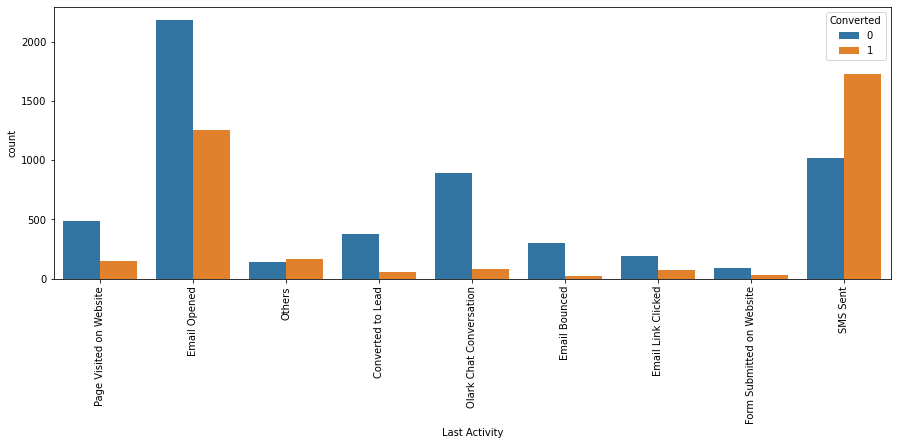

In [249]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(df['Last Activity'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

INFERENCES:-

1. Maximum number of last activity on website was done during opening of Email,followed by SMS sent.
    
2. Conversion Rate of last activity through SMS is high.


In [250]:
#Check the Null Values in All Columns:

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

In [251]:
# checking percentage of nulls in rows

100*(df.isnull().sum(axis=1)/df.shape[1])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9235    0.0
9236    0.0
9237    0.0
9238    0.0
9239    0.0
Length: 9240, dtype: float64

In [252]:
# Rest missing values are under 2% so we can drop these rows.

df.dropna(inplace = True)

In [253]:
df.shape

(9103, 26)

In [254]:
df.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                                        0
Update me on Supply Chain Content           0
Get updates on DM Content         

Now Data is clean and we can start with the analysis part.

In [255]:
#Lead Origin

df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

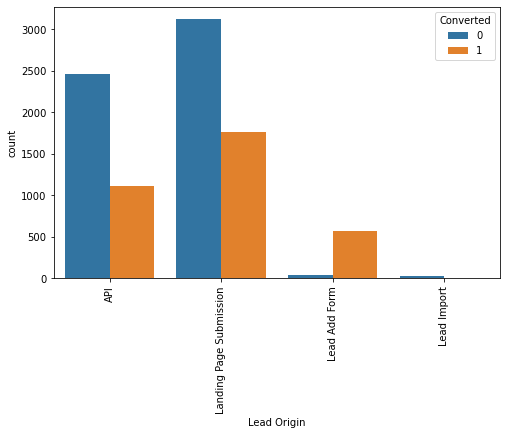

In [256]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(df['Lead Origin'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


INFERENCES:-

1. API and Landing Page Submission bring higher number of leads as well as conversion.
   
2. Lead Add Form has a very high conversion rate but count of leads are not very high.
    
3. Lead Import and Quick Add Form get very few leads.
    
4. In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission      origin and generate more leads from Lead Add Form.



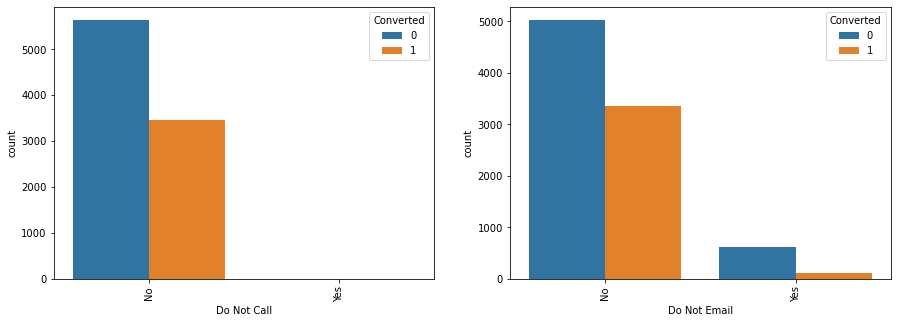

In [257]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(df['Do Not Call'], hue=df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(df['Do Not Email'], hue=df.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

' 

### IMBALANCED VARIABLES THAT CAN BE DROPPED 

In [258]:
df.shape

(9103, 26)

In [259]:
df['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

We will not drop "Do Not Email' column since it is not that much skewed as compared to others.

In [260]:
df['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [261]:
df.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [262]:
df.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [263]:
df['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [264]:
df['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [265]:
df['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [266]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [267]:
df['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [268]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [269]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [270]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [271]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [272]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

### DROPPING ALL THE ABOVE IMBALANCED COLUMNS

In [273]:
df.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [274]:
df.shape

(9103, 14)

In [275]:
#checking value counts of last Notable Activity

df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [276]:
#clubbing lower frequency values

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

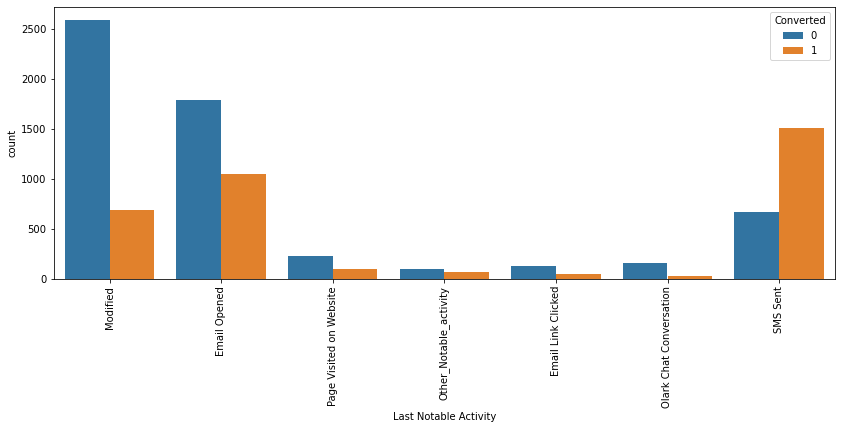

In [277]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()



INFERENCE:-

1. Chances of conversion rate is higher if the advertisment of the course is sent through SMS,followed by advertisment through Email.

In [278]:
#checking value counts for variable

df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

## Numerical Attributes Analysis:- 

In [279]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.02043282434362

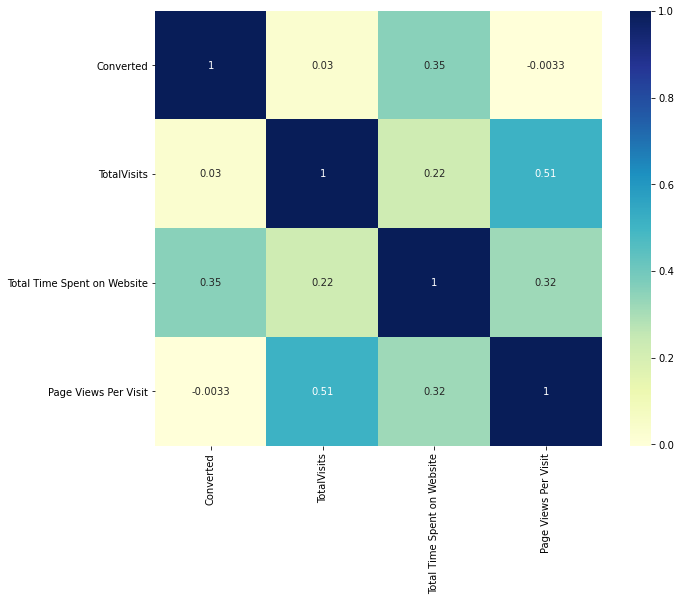

In [280]:
#Checking correlations of numeric values
# figure size

plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [281]:
# Total Visits

df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

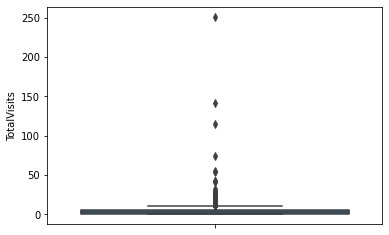

In [282]:
#visualizing spread of 'TotalVisits' variable
sns.boxplot(y=df['TotalVisits'])
plt.show()

INFERENCES:;

1. Outliers are present in the data.


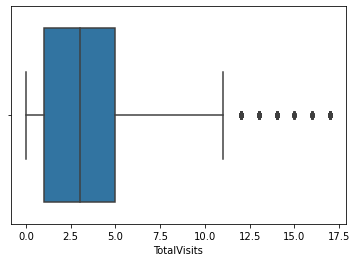

In [283]:
# We will cap the outliers to 99% value for analysis.

percentiles = df['TotalVisits'].quantile([0.01,0.99]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]
sns.boxplot(df['TotalVisits'])
plt.show()

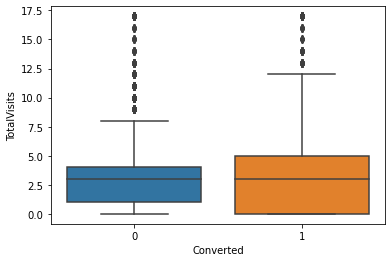

In [284]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

INFERENCES:-

1. Median for converted and not converted leads are the same.

2. Nothng conclusive can be said on the basis of Total Visits.

In [285]:
#Total Time Spent on Website

df['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

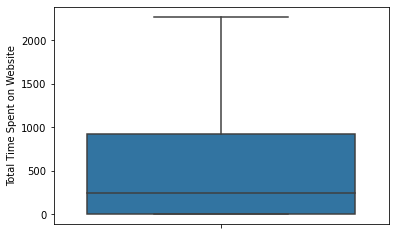

In [286]:
#visualizing spread of 'Total Time Spent on Website'

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

Since there are no major Outliers for the above variable,we don't do any Outlier Treatment for this above Column.

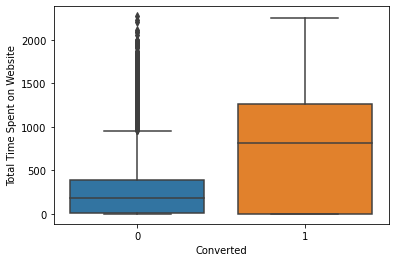

In [287]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

INFERENCES:-

1. Leads spending more time on the weblise are more likely to be converted.

2. Website should be made more engaging to make leads spend more time. 

In [288]:
#"Page Views Per Visit"

df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

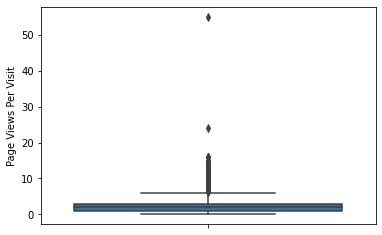

In [289]:
#visualizing spread of 'Page Views Per Visit'

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

INFERENCES:-

1. As we can see there are a number of outliers in the data.

2. We will cap the outliers to 99% value for analysis.

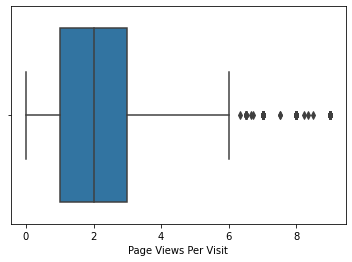

In [290]:
percentiles = df['Page Views Per Visit'].quantile([0.01,0.99]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]
sns.boxplot(df['Page Views Per Visit'])
plt.show()

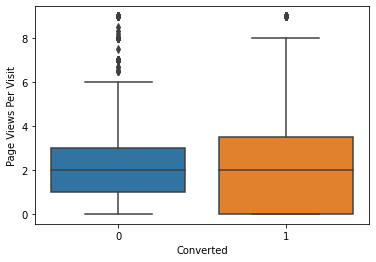

In [291]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.show()

INFERENCES:-

1. Median for converted and unconverted leads is the same.

2. Nothing can be said specifically for lead conversion from Page Views Per Visit. 

In [292]:
#checking missing values in leftover columns/

round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

There are no missing values in the columns to be analyzed further.

In [293]:
df.shape

(9103, 14)

# 3. DATA PREPARATION :-

## Dummy Variable Creation:- 

In [294]:
#getting a list of categorical columns

cat1=df.select_dtypes(include=['object']).columns
cat1

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [295]:
# List of variables to map

var =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[var] = df[var].apply(binary_map)

In [296]:
#getting dummies and dropping the first column and adding the results to the master dataframe

dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

df = pd.concat([df,dummy],1)

In [297]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [298]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [299]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
df = pd.concat([df, dummy], axis = 1)

In [300]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [301]:
#dropping the original columns after dummy variable creation

df.drop(cat1,1,inplace = True)
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 4. Train-Test Split & Logistic Regression Model Building:-

In [302]:
from sklearn.model_selection import train_test_split

# Putting response variable to y

y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)

In [303]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [304]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6372 non-null   float64
 1   Total Time Spent on Website                           6372 non-null   int64  
 2   Page Views Per Visit                                  6372 non-null   float64
 3   Lead Origin_Landing Page Submission                   6372 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6372 non-null   uint8  
 5   Lead Origin_Lead Import                               6372 non-null   uint8  
 6   What is your current occupation_Housewife             6372 non-null   uint8  
 7   What is your current occupation_Other                 6372 non-null   uint8  
 8   What is your current occupation_Student               6

In [305]:
#feature scaling of numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7962,-0.105932,1.476324,-0.420056,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
5520,1.113025,-0.771066,2.354047,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1962,0.503547,-0.571257,0.084327,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1566,3.246199,1.393834,0.588709,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9170,-1.020149,-0.881052,-1.176630,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


#### Feature Selection Using RFE:- 

In [306]:


import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [307]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True])

In [308]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('What is your current occupation_Housewife', False, 19),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 12),
 ('What is your current occupation_Unemployed', False, 13),
 ('What is your current occupation_Working Professional', False, 4),
 ('City_Other Cities', False, 24),
 ('City_Other Cities of Maharashtra', False, 20),
 ('City_Other Metro Cities', False, 26),
 ('City_Thane & Outskirts', False, 28),
 ('City_Tier II Cities', False, 27),
 ('Specialization_Banking, Investment And Insurance', False, 16),
 ('Specialization_Business Administration', False, 25),
 ('Specialization_E-Business', False, 21),
 ('Specialization_E-COMMERCE', False, 11),
 ('Specialization_International Business', Fa

In [309]:
#list of RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [310]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Sourc

In [311]:
# BUILDING MODEL : 1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1294.7
Date:                Mon, 11 Jan 2021   Deviance:                       2589.3
Time:                        11:38:16   Pearson chi2:                 8.33e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0918      0.090    -12.135      0.000      -1.268      -0.915
Total Time Spent on Website                       0.9204      0.053     17.416      0.000       0.817       1.024
Lead Origin_Lead Add Form                         1.6709      0.415      4.022      0.000       0.857       2.485
Lead Source_Direct Traffic                       -0.6760      0.131     -5.175      0.000      -0.932      -0.420
Lead Source_Organic Search                       -0.3270      0.159     -2.052      0.040      -0.639      -0.015
Lead Source_Referral Sites                       -0.6466      0.488     -1.325      0.185      -1.603       0.310
Lead Source_Welingak Website                      3.4030      0.840      4.051      0.000       1.757       5.049
Last Notable Activity_Modified                   -1.0531      0.131     -8.068      0.000      -1.309      -0.797
Last Notable Activity_Olark Chat Conversation    -1.2917      0.405     -3.188      0.001      -2.086      -0.498
Last Notable Activity_SMS Sent                    2.0245      0.131     15.503      0.000       1.769       2.280
Tags_Closed by Horizzon                           6.1602      0.727      8.469      0.000       4.734       7.586
Tags_Interested in other courses                 -2.1399      0.367     -5.833      0.000      -2.859      -1.421
Tags_Lost to EINS                                 6.0876      0.725      8.391      0.000       4.666       7.510
Tags_Other_Tags                                  -2.4812      0.212    -11.698      0.000      -2.897      -2.066
Tags_Ringing                                     -3.5901      0.248    -14.450      0.000      -4.077      -3.103
Tags_Will revert after reading the email          4.3078      0.181     23.762      0.000       3.952       4.663
=================================================================================================================
"""

In [312]:
#dropping column with high p-value

col = col.drop('Lead Source_Referral Sites',1)

In [313]:
#BUILDING MODEL : 2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1295.6
Date:                Mon, 11 Jan 2021   Deviance:                       2591.3
Time:                        11:38:16   Pearson chi2:                 8.35e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1091      0.089    -12.438      0.000      -1.284      -0.934
Total Time Spent on Website                       0.9197      0.053     17.400      0.000       0.816       1.023
Lead Origin_Lead Add Form                         1.6824      0.415      4.052      0.000       0.869       2.496
Lead Source_Direct Traffic                       -0.6624      0.130     -5.083      0.000      -0.918      -0.407
Lead Source_Organic Search                       -0.3132      0.159     -1.969      0.049      -0.625      -0.001
Lead Source_Welingak Website                      3.4048      0.840      4.054      0.000       1.759       5.051
Last Notable Activity_Modified                   -1.0476      0.130     -8.032      0.000      -1.303      -0.792
Last Notable Activity_Olark Chat Conversation    -1.2754      0.405     -3.148      0.002      -2.069      -0.481
Last Notable Activity_SMS Sent                    2.0312      0.130     15.567      0.000       1.775       2.287
Tags_Closed by Horizzon                           6.1650      0.727      8.476      0.000       4.739       7.591
Tags_Interested in other courses                 -2.1633      0.366     -5.907      0.000      -2.881      -1.446
Tags_Lost to EINS                                 6.0929      0.725      8.399      0.000       4.671       7.515
Tags_Other_Tags                                  -2.4799      0.212    -11.691      0.000      -2.896      -2.064
Tags_Ringing                                     -3.5854      0.248    -14.432      0.000      -4.072      -3.099
Tags_Will revert after reading the email          4.3079      0.181     23.763      0.000       3.953       4.663
=================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables.

In [314]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [315]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.81
13,Tags_Will revert after reading the email,1.63
7,Last Notable Activity_SMS Sent,1.52
5,Last Notable Activity_Modified,1.48
2,Lead Source_Direct Traffic,1.45
4,Lead Source_Welingak Website,1.35
11,Tags_Other_Tags,1.30
0,Total Time Spent on Website,1.23
8,Tags_Closed by Horizzon,1.23
12,Tags_Ringing,1.22


So the Values seem to be in order. So now, moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [316]:
# Getting the Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.450158
5520    0.077226
1962    0.005698
1566    0.988802
9170    0.012137
5097    0.127926
8954    0.029782
309     0.944377
5519    0.527911
1050    0.985578
dtype: float64

In [317]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.45015758, 0.07722585, 0.00569766, 0.98880194, 0.01213669,
       0.12792629, 0.02978239, 0.94437652, 0.52791078, 0.98557827])

In [318]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.450158,7962
1,0,0.077226,5520
2,0,0.005698,1962
3,1,0.988802,1566
4,0,0.012137,9170


In [319]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.450158,7962,0
1,0,0.077226,5520,0
2,0,0.005698,1962,0
3,1,0.988802,1566,1
4,0,0.012137,9170,0


In [320]:
from sklearn import metrics

# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3774  179]
 [ 297 2122]]


In [321]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9252981795354677


In [322]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [323]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8772219925589086

In [324]:
# Let us calculate specificity

TN / float(TN+FP)

0.9547179357450037

In [325]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.04528206425499621


In [326]:
# positive predictive value 

print (TP / float(TP+FP))

0.9222077357670578


In [327]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9270449521002211


### PLOTTING ROC CURVE:-

In [328]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [329]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

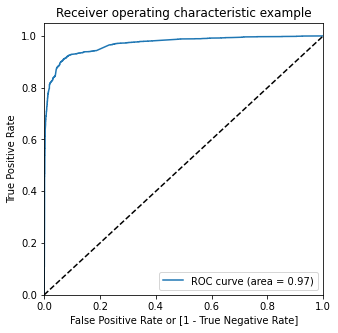

In [330]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

#### Finding Optimal Cutoff Point:-

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:-

In [331]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.450158,7962,0,1,1,1,1,1,0,0,0,0,0
1,0,0.077226,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.005698,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.988802,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.012137,9170,0,1,0,0,0,0,0,0,0,0,0


In [332]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.826271  0.970649  0.737921
0.2   0.2  0.907407  0.930136  0.893499
0.3   0.3  0.921532  0.912360  0.927144
0.4   0.4  0.925141  0.895411  0.943334
0.5   0.5  0.925298  0.877222  0.954718
0.6   0.6  0.916510  0.830095  0.969390
0.7   0.7  0.917608  0.817693  0.978750
0.8   0.8  0.909134  0.786275  0.984316
0.9   0.9  0.887633  0.718892  0.990893


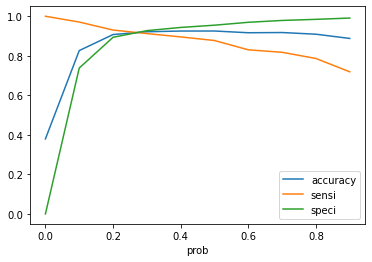

In [333]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [334]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.450158,7962,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.077226,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.005698,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.988802,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.012137,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [335]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.450158,7962,1,45
1,0,0.077226,5520,0,8
2,0,0.005698,1962,0,1
3,1,0.988802,1566,1,99
4,0,0.012137,9170,0,1


In [336]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9215317011927181

In [337]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3665,  288],
       [ 212, 2207]], dtype=int64)

In [338]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [339]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.9123604795369987

In [340]:
# Let us calculate specificity
TN / float(TN+FP)

0.9271439413103971


INFERENCES:-

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

    Accuracy : 92.15%
    Sensitivity : 91.23%
    Specificity : 92.71%



In [341]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3504,-0.105932,-0.103815,0.336518,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4050,-1.020149,-0.881052,-1.176630,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
7201,-0.410671,0.424120,-0.167865,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1196,0.198807,-0.105648,0.840900,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8219,1.113025,-0.428274,-0.293960,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [342]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Welingak Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3504,-0.103815,0,0,1,0,0,0,0,0,0,0,0,1,0
4050,-0.881052,1,0,0,0,0,0,1,0,0,0,0,0,1
7201,0.424120,0,1,0,0,0,0,1,0,0,0,1,0,0
1196,-0.105648,0,0,1,0,0,0,0,0,0,0,0,1,0
8219,-0.428274,0,1,0,0,0,0,0,0,0,1,0,0,0


In [343]:
X_test_sm = sm.add_constant(X_test)

#### PREDICTIONS ON TEST SET:-

In [344]:
y_test_pred = res.predict(X_test_sm)

In [345]:
y_test_pred[:10]

3504    0.006040
4050    0.997767
7201    0.138222
1196    0.006030
8219    0.980688
8747    0.127926
9048    0.666138
6524    0.005726
7693    0.058267
8187    0.142922
dtype: float64

In [346]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [347]:
# Let's see the head

y_pred_1.head()

,0
3504,0.006040
4050,0.997767
7201,0.138222
1196,0.006030
8219,0.980688


In [348]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [349]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [350]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [351]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [352]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.006040
1,1,4050,0.997767
2,0,7201,0.138222
3,0,1196,0.006030
4,1,8219,0.980688


In [353]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.006040
1,1,4050,0.997767
2,0,7201,0.138222
3,0,1196,0.006030
4,1,8219,0.980688


In [354]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [355]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.006040,1
1,4050,1,0.997767,100
2,7201,0,0.138222,14
3,1196,0,0.006030,1
4,8219,1,0.980688,98


In [356]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [357]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.006040,1,0
1,4050,1,0.997767,100,1
2,7201,0,0.138222,14,0
3,1196,0,0.006030,1,0
4,8219,1,0.980688,98,1


In [358]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9300622482607104

In [359]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1583,  106],
       [  85,  957]], dtype=int64)

In [360]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [361]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.918426103646833

In [362]:
# Let us calculate specificity

TN / float(TN+FP)

0.9372409709887507


INFERENCES:-

After running the model on the Test Data these are the figures we obtain:

    Accuracy : 93%
    Sensitivity : 91.84%
    Specificity : 93.72%



# 5. Final Observation:-

Let us compare the values obtained for Train & Test:

Train Data:

    Accuracy : 92.15%
    Sensitivity : 91.23%
    Specificity : 92.71%
    
    

Test Data:

    Accuracy : 93%
    Sensitivity : 91.84%
    Specificity : 93.72%



Final List of variables that have positive effect on Conversion:
- Total Time Spent on Website
- Lead Origin with Lead Add Form as the category.
- Last Notable Activity with SMS Sent as the category.
- Tags with Closed by Horizzon, Lost to EINS, Will revert after reading the email as categories.

Final List of variables that have negative effect on Conversion:
- Lead Source with Direct Traffic, Organic Search as the category and  Referral Sites as categories .
- Last Notable Activity with Modified and Olark Chat Conversation as the categories.
- Tags with Interested in other course, Other_tags and Ringing as categories.
